In [1]:
#importing the required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir("D:\Simplilearn\Machine Learning\Advance House Regression")

In [3]:
# reading the train and test file 
housetrain=pd.read_csv('train (1).csv')
housetest=pd.read_csv('test (1).csv')

In [4]:
# checking the shape of the file with .shape function
print(housetrain.shape)
print(housetest.shape)

(1460, 81)
(1459, 80)


In [5]:
# checking the coloumns in the train dataset
housetrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# checking the columns in the test dataset
housetest.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# checking the how many types of dataset present in the data
housetrain.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
housetest.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [9]:
# checking the null values in the train dataset
housetrain.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [10]:
# checking the null values in the test dataset
housetest.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [11]:
# dropping the dependant variable  
housetrain1=housetrain.drop('SalePrice',axis=1)

In [12]:
# combining the test and train file
combinedata=pd.concat([housetrain1,housetest],axis=0)

In [13]:
# checking the null values in combine dataset
combinedata.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
                 ... 
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [14]:
# splitting the combine data on it's types (number and object)
numericdata=combinedata.select_dtypes(include=np.number)
objectdata=combinedata.select_dtypes(include=np.object)
print(numericdata.shape) 
print(objectdata.shape) 

(2919, 37)
(2919, 43)


In [15]:
# checking the null values in object dataset
objectdata.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Exterior1st         1
SaleType            1
KitchenQual         1
Electrical          1
RoofStyle           0
HouseStyle          0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
Foundation          0
Street              0
RoofMatl            0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SaleCondition       0
dtype: int64

In [16]:
# filling the null values to unknown in object data
nonecols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
for col in nonecols:
    objectdata[col]=objectdata[col].fillna('Unknown')

C:\Users\rohit\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
# checking if null values filled properly
objectdata.Alley.value_counts()

Unknown    2721
Grvl        120
Pave         78
Name: Alley, dtype: int64

In [18]:
# importing the simple imputer to fill the null values in the object data with it's most frequent with in it's columns 
from sklearn.impute import SimpleImputer

In [19]:
objectimputer=SimpleImputer(missing_values=np.nan,
                            strategy='most_frequent')

In [20]:
objectdata=objectimputer.fit_transform(objectdata)

In [21]:
labels=combinedata.select_dtypes(include=np.object).columns

In [22]:
objectdatadf=pd.DataFrame(objectdata,columns=labels)

In [23]:
objectdatadf.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
1,RL,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
2,RL,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
3,RL,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Unknown,Unknown,Unknown,WD,Abnorml
4,RL,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal


In [24]:
combinedata.GarageCond.value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [25]:
combinedata.GarageFinish.value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [26]:
combinedata.GarageQual.value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [27]:
combinedata.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [28]:
# checking the null values in the numeric data
numericdata.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [29]:
# filling null values with median with the help of simple imputer for numeric data 
numericimputer=SimpleImputer(missing_values=np.nan,strategy='median')

In [30]:
numericdata=numericimputer.fit_transform(numericdata)

In [31]:
numericlabels=combinedata.select_dtypes(include=np.number).columns

In [32]:
numericdatadf=pd.DataFrame(numericdata,columns=numericlabels)

In [33]:
numericdatadf.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [34]:
numericdatadf.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [35]:
# there are some columns which has numerical data but can not act as numerical data so changed (copying) into categocrical data type
categoricaldf=numericdatadf[['YearBuilt','YearRemodAdd','GarageYrBlt',
                            'MoSold', 'YrSold','OverallQual',
                             'OverallCond']]

In [36]:
# removing these data from the numerical data
numericdatadf=numericdatadf.drop(['YearBuilt','YearRemodAdd','GarageYrBlt',
                            'MoSold', 'YrSold','OverallQual',
                             'OverallCond'],axis=1)

In [37]:
# checking the shape of the all three types of data
print(objectdatadf.shape)
print(categoricaldf.shape)
print(numericdatadf.shape)

(2919, 43)
(2919, 7)
(2919, 30)


In [38]:
objectdatadf.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
1,RL,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
2,RL,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal
3,RL,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Unknown,Unknown,Unknown,WD,Abnorml
4,RL,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal


In [39]:
# label encoding the object data with Label Encoder
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [41]:
objectdatadummy=objectdatadf.apply(le.fit_transform)

In [42]:
objectdatadummy.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,4,8,4


In [43]:
# Label Encoding the Categorical data
categoricaldummy=categoricaldf.apply(le.fit_transform)

In [44]:
# Combing all the three dataset 
combineddatafinal=pd.concat([objectdatadummy,categoricaldummy,
                             numericdatadf],axis=1)

In [45]:
# checking shape of the combined data 
combineddatafinal.shape

(2919, 80)

In [46]:
combineddatafinal.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,3,1,2,3,3,0,4,0,5,2,...,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0
1,3,1,2,3,3,0,2,0,24,1,...,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,2,0,3,0,4,0,5,2,...,1.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,0,3,0,0,0,6,2,...,1.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0
4,3,1,2,0,3,0,2,0,15,2,...,1.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.impute import SimpleImputer

In [48]:
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [49]:
combinedata=combinedata.T.drop_duplicates().T

In [50]:
print(combinedata.shape)

(2919, 80)


In [51]:
combinedata[(combinedata!=0).any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<AxesSubplot:>

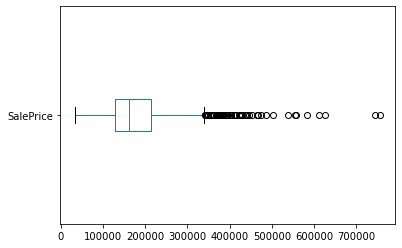

In [52]:
# checking the outliers in dependant variable
housetrain.SalePrice.plot(kind='box',vert=False)

<AxesSubplot:>

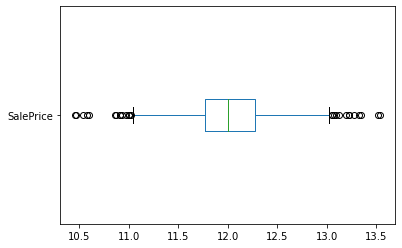

In [53]:
# correcting the right skewness with the logarithamic function, not removed the outliers
np.log(housetrain.SalePrice).plot(kind='box',vert=False)

In [54]:
# transforming the dataset values with the help of Standard Scaler in which the mean value is 0 and std deviation value is 1
# for practice purpose, try the dataset changing in the MinMax Scaler and Robust Scaler
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()

In [56]:
combineddatafinal=combineddatafinal.drop('Id',axis=1)

In [57]:
scaleddata=scaler.fit_transform(combineddatafinal)

In [58]:
scaleddata

array([[-0.04215657,  0.06424926,  0.25728307, ..., -0.28593546,
        -0.06315017, -0.08959196],
       [-0.04215657,  0.06424926,  0.25728307, ..., -0.28593546,
        -0.06315017, -0.08959196],
       [-0.04215657,  0.06424926,  0.25728307, ..., -0.28593546,
        -0.06315017, -0.08959196],
       ...,
       [-0.04215657,  0.06424926,  0.25728307, ..., -0.28593546,
        -0.06315017, -0.08959196],
       [-0.04215657,  0.06424926,  0.25728307, ..., -0.28593546,
        -0.06315017,  1.14431218],
       [-0.04215657,  0.06424926,  0.25728307, ..., -0.28593546,
        -0.06315017, -0.08959196]])

In [59]:
# applying Min-Max Scaler changes data into 0 to 1 range
from sklearn.preprocessing import MinMaxScaler

In [60]:
normalize=MinMaxScaler()

In [61]:
normalizedata=normalize.fit_transform(combineddatafinal)

In [62]:
normalizedata

array([[0.75      , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.75      , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 1.        , 1.        , ..., 0.        , 0.        ,
        0.04117647],
       [0.75      , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
# applying Robust scaler it works on the interquartile range to standardize the data 
from sklearn.preprocessing import RobustScaler

In [64]:
robust=RobustScaler()

In [65]:
robustdata=robust.fit_transform(combineddatafinal)

In [66]:
robustdata

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 700.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [67]:
# spiliting the data into train test data
housetraindf=combineddatafinal[0:1460]
print(housetraindf.shape)
housetestdf=combineddatafinal[1460:2919]
print(housetestdf.shape)

(1460, 79)
(1459, 79)


In [68]:
combineddatafinal['SalePrice']=housetrain.SalePrice

In [69]:
combineddatafinal.OverallCond.value_counts()

4    1645
5     531
6     390
7     144
3     101
2      50
8      41
1      10
0       7
Name: OverallCond, dtype: int64

In [70]:
# checking analysis with the groupby function
combineddatafinal.SalePrice.groupby(combineddatafinal.OverallCond).mean()

OverallCond
0     61000.000000
1    141986.400000
2    101929.400000
3    120438.438596
4    203146.914738
5    153961.591270
6    158145.487805
7    155651.736111
8    216004.545455
Name: SalePrice, dtype: float64

In [71]:
combineddatafinal.SalePrice.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [72]:
# assign the independant variale as X and dependant variable as y
y=housetrain.SalePrice  
X=housetraindf

In [74]:
# fitting the Linear Regression model on the dataset (not taken any scaled data)
from sklearn.linear_model import LinearRegression

In [75]:
LinReg=LinearRegression()

In [76]:
LinRegmodel=LinReg.fit(X,y)

In [77]:
LinRegmodel.score(X,y)

0.8544640146260464

In [78]:
LinRegmodel.intercept_

248948.06871532142

In [79]:
print(list(zip(LinRegmodel.coef_,X)))

[(-1572.7873997091458, 'MSZoning'), (27694.724257203718, 'Street'), (4340.945097720054, 'Alley'), (-856.0199255620821, 'LotShape'), (3002.409820605621, 'LandContour'), (-51610.87546316184, 'Utilities'), (37.164200043496976, 'LotConfig'), (5172.526621104614, 'LandSlope'), (393.28303855757576, 'Neighborhood'), (-1076.1209729601267, 'Condition1'), (-8629.336177011704, 'Condition2'), (-2720.182321758028, 'BldgType'), (-981.5867985675311, 'HouseStyle'), (1867.155131882055, 'RoofStyle'), (5642.464590562894, 'RoofMatl'), (-1157.7137844760416, 'Exterior1st'), (552.649712563198, 'Exterior2nd'), (4681.601887541143, 'MasVnrType'), (-9653.640346216938, 'ExterQual'), (739.1402924517488, 'ExterCond'), (860.3985836882764, 'Foundation'), (-8904.479837238412, 'BsmtQual'), (2254.8242631521807, 'BsmtCond'), (-3728.342533159584, 'BsmtExposure'), (-736.5972919826079, 'BsmtFinType1'), (809.3524522965332, 'BsmtFinType2'), (-1819.3934735078776, 'Heating'), (-763.2054997441021, 'HeatingQC'), (-1075.64114545696

In [80]:
LinRegpedict=LinRegmodel.predict(X)

In [81]:
LinRegResidual=y-LinRegpedict 

In [82]:
np.sqrt(np.mean(LinRegResidual**2))

30296.28180675005

In [83]:
LinRegtest=LinRegmodel.predict(housetestdf)

In [84]:
LinRegtest

array([107199.47627537, 157237.62389181, 167021.89863965, ...,
       143802.7685456 , 114851.17361398, 242529.96029474])

In [85]:
# fitting the model with the scaled data 
scaledata=scaler.fit_transform(housetraindf)

In [86]:
LinRegscalemodel=LinReg.fit(scaledata,np.log(y))

In [87]:
LinRegscalemodel.score(scaledata,np.log(y)) # can clearly see the accuracy improve with the scaled data

0.8879010574180118

In [88]:
# predicting for the test data
LinRegscalemodeltest=LinRegscalemodel.predict(housetestdf)

In [89]:
LinRegscalemodeltest

array([1.08356600e+14, 9.44185850e+13, 1.01779083e+14, ...,
       8.13802174e+13, 7.41286286e+13, 1.24247335e+14])

In [90]:
LinRegscaledpredict=LinRegscalemodel.predict(scaleddata)

In [91]:
LinRegscaledpredict

array([-2.99173920e+09, -3.36571866e+09, -2.41085813e+09, ...,
       -3.11336056e+09, -1.20042459e+10,  2.15509208e+09])

In [92]:
# checking the accuracy of the model (linear regression) with the cross val score, taking 10 samples  
from sklearn.model_selection import cross_val_score

In [93]:
cross_val_score(LinRegmodel,X,y,cv=10)

array([0.8944009 , 0.8322485 , 0.89519738, 0.74038038, 0.8585626 ,
       0.85615155, 0.83992568, 0.85410937, 0.47153872, 0.76206919])

In [94]:
# applying desion tree regressor model
from sklearn.tree import DecisionTreeRegressor

In [95]:
TR=DecisionTreeRegressor() # no hyperparameter tunning given, proceed with the default parameters.

In [96]:
TR.fit(X,y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [97]:
TR.score(X,y) # showing accuracy of 100 means, it is overfitting the data

1.0

[Text(249.8928621402505, 213.55714285714285, 'X[48] <= 6.5\nmse = 6306788585.349\nsamples = 1460\nvalue = 180921.196'),
 Text(186.31883363073868, 205.79142857142858, 'X[48] <= 5.5\nmse = 2426928665.05\nsamples = 1231\nvalue = 157832.433'),
 Text(113.05941304724644, 198.0257142857143, 'X[61] <= 1378.5\nmse = 1411538921.037\nsamples = 912\nvalue = 140383.976'),
 Text(62.01679345780507, 190.26, 'X[57] <= 1007.5\nmse = 837746927.031\nsamples = 564\nvalue = 124907.778'),
 Text(22.995820572503963, 182.4942857142857, 'X[28] <= 0.5\nmse = 641983560.06\nsamples = 376\nvalue = 113919.918'),
 Text(3.7087987321711573, 174.72857142857143, 'X[0] <= 1.0\nmse = 573823485.316\nsamples = 56\nvalue = 84009.071'),
 Text(0.6791505546751189, 166.96285714285713, 'X[48] <= 3.5\nmse = 73537591.5\nsamples = 4\nvalue = 41551.0'),
 Text(0.45276703645007926, 159.19714285714286, 'X[46] <= 7.5\nmse = 5351738.0\nsamples = 3\nvalue = 36737.0'),
 Text(0.22638351822503963, 151.43142857142857, 'mse = 0.0\nsamples = 1\nva

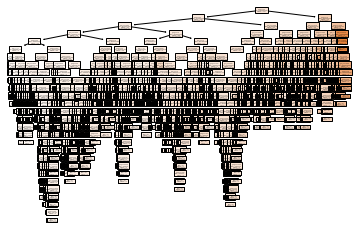

In [98]:
# plotting the decision tree
from sklearn.tree import plot_tree
plot_tree(TR, filled=True)

In [99]:
# checking the accuracy of the model (decision tree regressor) with the cross val score, taking 10 samples 
from sklearn.model_selection import cross_val_score

In [100]:
cross_val_score(TR,X,y,cv=10)

array([0.72710879, 0.78100073, 0.80159318, 0.70491033, 0.83360621,
       0.84204344, 0.80223104, 0.62332809, 0.45535622, 0.73602003])

In [121]:
# Applying Gradient Boosting Regressor keeping parameter default
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [122]:
gbr_model=GradientBoostingRegressor()

In [123]:
gbr_model.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
gbr_model.score(X,y)

0.9639527004415478

In [125]:
gbr_predict=gbr_model.predict(X)

In [126]:
print(gbr_predict)

[205884.69599756 166825.01886371 210779.43569691 ... 257823.6009127
 139023.58992514 148780.16191774]


In [127]:
# predicting for the testing data
gbr_predict_test=gbr_model.predict(housetestdf)

In [128]:
gbr_predict_test

array([117846.70952328, 160878.39101292, 176064.94402416, ...,
       163897.79087946, 119572.68616118, 234893.13666953])

In [129]:
# checking the accuracy of the model (gradient boosting regressor) with the cross val score, taking 10 samples 
cross_val_score(gbr_model,X,y,cv=10)

array([0.90435539, 0.90866058, 0.94205957, 0.77603871, 0.91454402,
       0.88167102, 0.88377755, 0.89866807, 0.88176055, 0.87794114])

In [131]:
r2_score(gbr_predict,y) # gradient boost giving the best score 

0.9611283207598736

In [133]:
# changing the predicted values predicted by gradient boost to the dataframe and saving into the csv file
pd.DataFrame(gbr_predict_test).to_csv('GBReg.csv')